<a href="https://colab.research.google.com/github/Farhanarkive/CS-485/blob/main/dynabenchR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    confusion_matrix, f1_score, precision_score, recall_score
)


def evaluate_dataset(csv_path, identity_columns, output_csv_name):

    print(f"\n\n==============================")
    print(f"Evaluating dataset: {csv_path}")
    print(f"==============================\n")

    # Load dataset
    df = pd.read_csv(csv_path)
    df["label"] = (df["target"] >= 0.5).astype(int)

    # Load model
    clf = pipeline("text-classification",
                   model="facebook/roberta-hate-speech-dynabench-r4-target")

    # Predictions
    preds = []
    batch_size = 100

    for i in range(0, len(df), batch_size):
        batch = df["comment_text"].iloc[i:i+batch_size].tolist()
        batch_preds = clf(batch, truncation=True, top_k=None)

        for pred in batch_preds:
            toxic_score = next(x['score'] for x in pred if x['label'] == 'hate')
            preds.append(1 if toxic_score > 0.5 else 0)

        if (i + batch_size) % 1000 == 0:
            print(f"Processed {i + batch_size} comments...")

    df["pred"] = preds
    print(f"\nTotal comments processed: {len(df)}")


    # Overall Metrics

    accuracy = accuracy_score(df["label"], df["pred"])
    precision, recall, f1, _ = precision_recall_fscore_support(
        df["label"], df["pred"], average="binary", zero_division=0
    )

    print("\nOverall Results:")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}")


    # Identity Bias Analysis

    print("\n====================================")
    print("Identity Bias Analysis")
    print("====================================")

    results = []

    for identity in identity_columns:

        subset = df[df[identity] > 0]

        if len(subset) == 0:
            continue

        id_accuracy = accuracy_score(subset["label"], subset["pred"])
        id_f1 = f1_score(subset["label"], subset["pred"], zero_division=0)
        id_precision = precision_score(subset["label"], subset["pred"], zero_division=0)
        id_recall = recall_score(subset["label"], subset["pred"], zero_division=0)

        tn, fp, fn, tp = confusion_matrix(
            subset["label"], subset["pred"], labels=[0,1]
        ).ravel()

        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

        results.append({
            "Identity": identity,
            "Count": len(subset),
            "F1": id_f1,
            "Precision": id_precision,
            "Recall": id_recall,
            "FPR": fpr,
            "Accuracy": id_accuracy
        })

        print(f"""
        {identity.upper()}
        Count: {len(subset)}
        F1 Score: {id_f1:.4f}
        Precision: {id_precision:.4f}
        Recall: {id_recall:.4f}
        FPR: {fpr:.4f}
        """)

    # Save to CSV
    results_df = pd.DataFrame(results)
    results_df.to_csv(output_csv_name, index=False)
    print(f"\nSaved identity metrics → {output_csv_name}\n")



# Run the evaluation separately for gender and race


gender_cols = ["male", "female", "transgender", "other_gender"]
race_cols = ["black", "white", "asian", "latino", "other_race_or_ethnicity"]


evaluate_dataset("balanced_gender_only.csv", gender_cols, "dynabench_gender_identity_metrics.csv")
evaluate_dataset("balanced_race_only.csv", race_cols, "dynabench_race_identity_metrics.csv")




Evaluating dataset: balanced_gender_only.csv



Device set to use cuda:0


Processed 1000 comments...
Processed 2000 comments...
Processed 3000 comments...
Processed 4000 comments...
Processed 5000 comments...
Processed 6000 comments...
Processed 7000 comments...
Processed 8000 comments...
Processed 9000 comments...
Processed 10000 comments...

Total comments processed: 10892

Overall Results:
Accuracy : 0.7602
Precision: 0.2829
Recall   : 0.3247
F1 Score : 0.3024

Identity Bias Analysis

        MALE
        Count: 5713
        F1 Score: 0.2945
        Precision: 0.2937
        Recall: 0.2953
        FPR: 0.1395
        

        FEMALE
        Count: 5437
        F1 Score: 0.3082
        Precision: 0.2940
        Recall: 0.3238
        FPR: 0.1559
        

        TRANSGENDER
        Count: 3196
        F1 Score: 0.3574
        Precision: 0.3095
        Recall: 0.4229
        FPR: 0.2194
        

        OTHER_GENDER
        Count: 2933
        F1 Score: 0.3388
        Precision: 0.3183
        Recall: 0.3621
        FPR: 0.1541
        

Saved identity m

Device set to use cuda:0


Processed 1000 comments...
Processed 2000 comments...
Processed 3000 comments...
Processed 4000 comments...
Processed 5000 comments...
Processed 6000 comments...
Processed 7000 comments...
Processed 8000 comments...
Processed 9000 comments...
Processed 10000 comments...
Processed 11000 comments...
Processed 12000 comments...
Processed 13000 comments...
Processed 14000 comments...
Processed 15000 comments...
Processed 16000 comments...
Processed 17000 comments...
Processed 18000 comments...
Processed 19000 comments...
Processed 20000 comments...
Processed 21000 comments...
Processed 22000 comments...
Processed 23000 comments...
Processed 24000 comments...
Processed 25000 comments...
Processed 26000 comments...
Processed 27000 comments...
Processed 28000 comments...
Processed 29000 comments...
Processed 30000 comments...
Processed 31000 comments...
Processed 32000 comments...
Processed 33000 comments...
Processed 34000 comments...

Total comments processed: 34680

Overall Results:
Accura

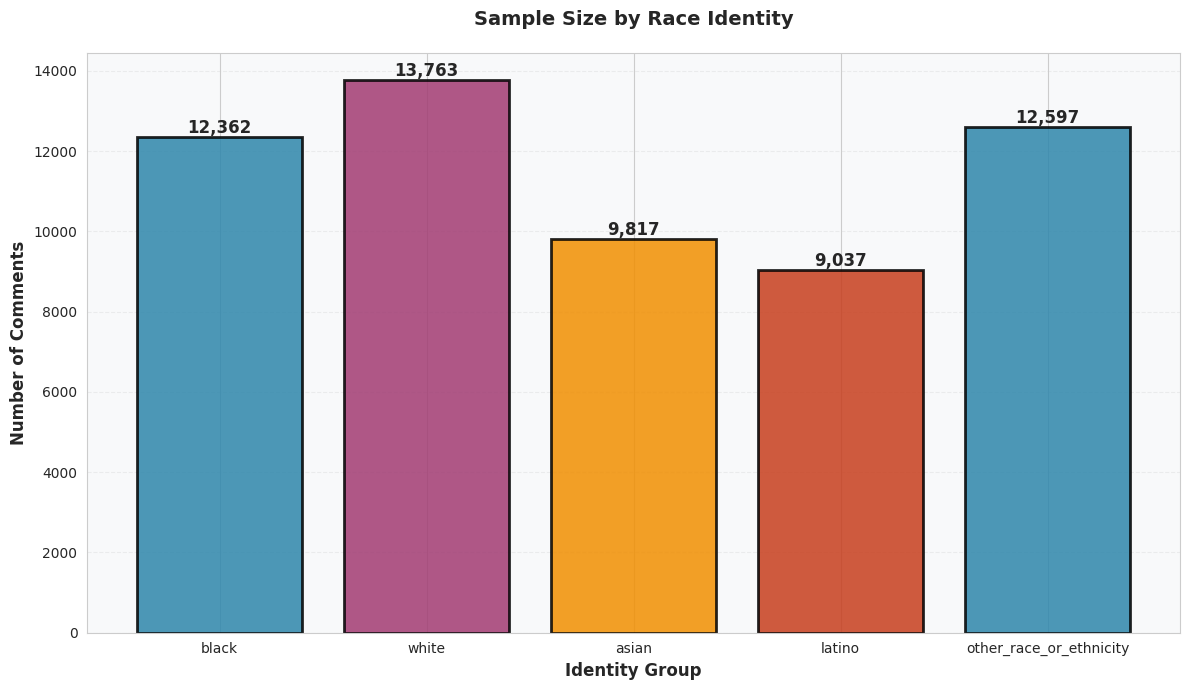

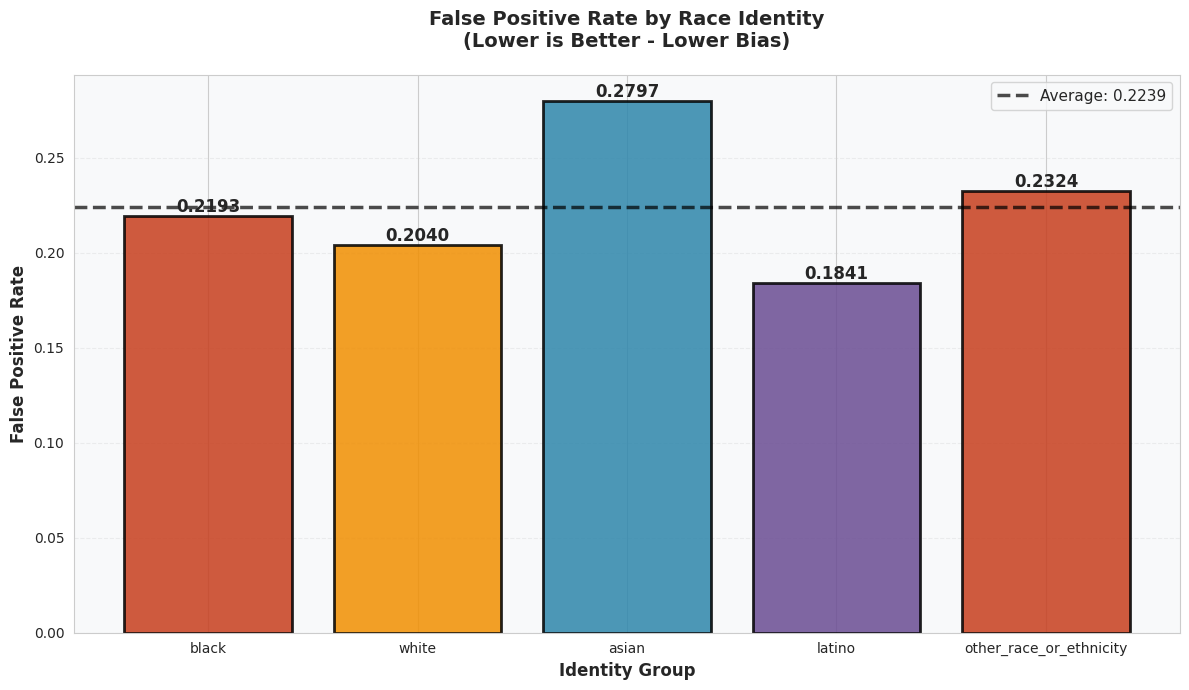

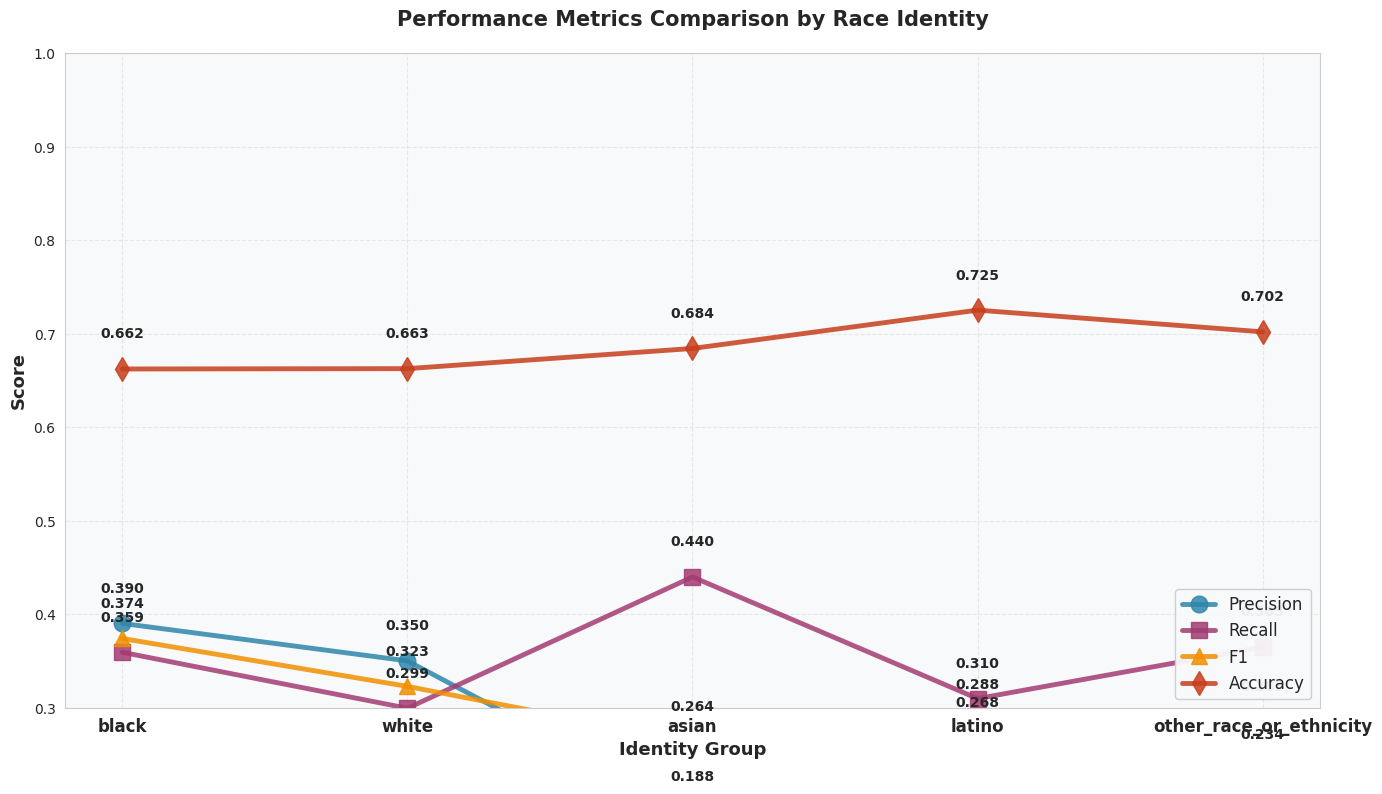


SUMMARY - RACE DATASET

                Identity  Count  Precision   Recall       F1  Accuracy      FPR
                  black 12,362   0.390053 0.359159 0.373969  0.662271 0.219348
                  white 13,763   0.350000 0.299323 0.322684  0.662646 0.204013
                  asian  9,817   0.188263 0.439778 0.263658  0.684221 0.279719
                 latino  9,037   0.268345 0.309642 0.287518  0.725241 0.184122
other_race_or_ethnicity 12,597   0.234136 0.364832 0.285225  0.701993 0.232360

✓ Visualizations saved:
  - dynabench_race_sample_size.png
  - dynabench_race_fpr_by_identity.png
  - dynabench_race_all_metrics.png
  - dynabench_race_metrics_line.png
  - dynabench_race_deviation_from_mean.png


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

DATASET_TYPE = "race"
# Load results
bias_df = pd.read_csv(f'dynabench_{DATASET_TYPE}_identity_metrics.csv')

# Set elegant style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f8f9fa'

#SAMPLE SIZE AND IDENTITY
fig, ax = plt.subplots(figsize=(12, 7))
colors_sample = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
bars = ax.bar(bias_df['Identity'], bias_df['Count'], color=colors_sample, alpha=0.85, edgecolor='black', linewidth=2)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Number of Comments', fontweight='bold', fontsize=12)
ax.set_xlabel('Identity Group', fontweight='bold', fontsize=12)
ax.set_title(f'Sample Size by {DATASET_TYPE.capitalize()} Identity', fontweight='bold', fontsize=14, pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(f'dynabench_{DATASET_TYPE}_sample_size.png', dpi=300, bbox_inches='tight')
plt.show()

#FALSE POSITIVE RATE BY IDENTITY
fig, ax = plt.subplots(figsize=(12, 7))

colors_fpr = ['#C73E1D', '#F18F01', '#2E86AB', '#6A4C93']
bars = ax.bar(bias_df['Identity'], bias_df['FPR'], color=colors_fpr, alpha=0.85, edgecolor='black', linewidth=2)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

overall_fpr = bias_df['FPR'].mean()
ax.axhline(overall_fpr, color='black', linestyle='--', linewidth=2.5, label=f'Average: {overall_fpr:.4f}', alpha=0.7)

ax.set_ylabel('False Positive Rate', fontweight='bold', fontsize=12)
ax.set_xlabel('Identity Group', fontweight='bold', fontsize=12)
ax.set_title(f'False Positive Rate by {DATASET_TYPE.capitalize()} Identity\n(Lower is Better - Lower Bias)', fontweight='bold', fontsize=14, pad=20)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(f'dynabench_{DATASET_TYPE}_fpr_by_identity.png', dpi=300, bbox_inches='tight')
plt.show()

#METRICS BY IDENTITY - LINE PLOT
fig, ax = plt.subplots(figsize=(14, 8))
metrics_plot = ['Precision', 'Recall', 'F1', 'Accuracy']
colors_lines = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
markers = ['o', 's', '^', 'd']
x_pos = np.arange(len(bias_df))

for i, metric in enumerate(metrics_plot):
    ax.plot(x_pos, bias_df[metric], marker=markers[i], markersize=12, linewidth=3.5,
            label=metric, color=colors_lines[i], alpha=0.85)

    # Add value labels
    for j, val in enumerate(bias_df[metric]):
        ax.text(j, val + 0.03, f'{val:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(x_pos)
ax.set_xticklabels(bias_df['Identity'], fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontweight='bold', fontsize=13)
ax.set_xlabel('Identity Group', fontweight='bold', fontsize=13)
ax.set_title(f'Performance Metrics Comparison by {DATASET_TYPE.capitalize()} Identity', fontweight='bold', fontsize=15, pad=20)
ax.legend(fontsize=12, loc='lower right', framealpha=0.95)
ax.set_ylim(0.3, 1)
ax.grid(True, alpha=0.4, linestyle='--')
plt.tight_layout()
plt.savefig(f'dynabench_{DATASET_TYPE}_metrics_line.png', dpi=300, bbox_inches='tight')
plt.show()


#SUMMARY TABLE
print("\n" + "="*80)
print(f"SUMMARY - {DATASET_TYPE.upper()} DATASET")
print("="*80)

summary_table = bias_df[['Identity', 'Count', 'Precision', 'Recall', 'F1', 'Accuracy', 'FPR']].copy()
summary_table['Count'] = summary_table['Count'].apply(lambda x: f'{int(x):,}')

print("\n", summary_table.to_string(index=False))

print(f"\n✓ Visualizations saved:")
print(f"  - dynabench_{DATASET_TYPE}_sample_size.png")
print(f"  - dynabench_{DATASET_TYPE}_fpr_by_identity.png")
print(f"  - dynabench_{DATASET_TYPE}_all_metrics.png")
print(f"  - dynabench_{DATASET_TYPE}_metrics_line.png")
print(f"  - dynabench_{DATASET_TYPE}_deviation_from_mean.png")

# New Section